In [15]:
# 朴素贝叶斯是一种基于贝叶斯理论的有效监督学习算法，
# 之所以称之为”朴素“，是因为它是基于样本特征之间互相独立的”朴素”假设
# 正因如此，不需要考虑样本特征之间的关系，贝叶斯分类器的效率非常高

# 导入numpy
import numpy as np
# 将X，y赋值为np数组
X = np.array([[0, 1, 0, 1],
              [1, 1, 1, 0],
              [0, 1, 1, 0],
              [0, 0, 0, 1],
              [0, 1, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 0, 1]])
y = np.array([0, 1, 1, 0, 1, 0, 0])
# 对不同分类计算每个特征为1的数量
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
# 打印计数结果
print("feature counts:\n{}".format(counts))


feature counts:
{0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


In [16]:
# 导入伯努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
# 使用伯努利贝叶斯拟合数据
clf = BernoulliNB()
clf.fit(X, y)
# 要进行预测的这一天，没有刮台风，也不闷热
# 但是多云，天气预报说没有雨
nextDay = [[0, 0, 1, 0]]
pre = clf.predict(nextDay)
if pre == [1]:
    print("rain!!")
else:
    print("no rain")

anotherDay = [[1, 1, 0, 1]]
pre2 = clf.predict(anotherDay)
if pre2 == [1]:    
    print("rain!!!")
else:
    print("no rain")
# 获取准确率
# nextday下雨的概率为86%
print("nextday probability:", clf.predict_proba(nextDay))
# anotherday不下雨的概率为92%
print("anotherday probability:", clf.predict_proba(anotherDay))


rain!!
no rain
nextday probability: [[0.13848881 0.86151119]]
anotherday probability: [[0.92340878 0.07659122]]


scores:0.544


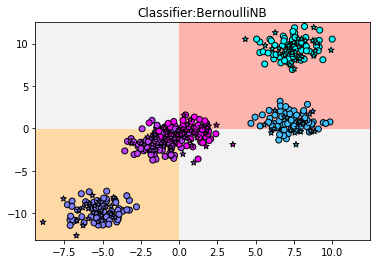

In [18]:
# 朴素贝叶斯有三种方法：
# ①伯努利朴素贝叶斯（Bernoulli Naive Bayes）
# ②高斯贝叶斯（Gaussian Naive Bayes）
# ③多项式贝叶斯（Multinomial Naive Bayes）

# 伯努利朴素贝叶斯，适合处理伯努利分布的数据集，即二项分布/0-1分布

# 假如使用复杂的数据集
# 导入数据集生成工具
from sklearn.datasets import make_blobs
# 导入数据集分析工具
from sklearn.model_selection import train_test_split
# 生成样本数为500，分类数为5的数据集
X, y = make_blobs(n_samples=500, centers=5, random_state=8)
# 将数据集拆分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
# 使用伯努利朴素贝叶斯拟合数据
nb = BernoulliNB()
nb.fit(X_train, y_train)
print("scores:{:.3f}".format(nb.score(X_test, y_test)))
# 可以看到大约一半的数据没有被正确归类，接下来我们通过图像查看它的工作过程

# 导入画图工具
import matplotlib.pyplot as plt
# 限定横坐标和纵坐标的最大值
x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
# 使用不同背景色表示不同分类
xx, yy = np.meshgrid(np.arange(x_min, y_max, .02),
                     np.arange(y_min, y_max, .02))
z = nb.predict(np.c_[(xx.ravel(), yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Pastel1)
# 将训练集和测试集用散点图表示
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.cool, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.cool, marker='*', edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:BernoulliNB")
plt.show()

# 可以看到分类图非常简单，就两条直线将5各类别分开。
# 这是因为伯努利朴素贝叶斯的默认参数二值化binarize = 0.0，
# 所以模型对于数据的判断是，如果特征1>=0，且特征2>=0，则数据点归为一类;
# 而特征1<0，且特征2<0，则归为一类
# 其余数据点归为第三类
